# Import Modules
You may need to install some of them.
But if you activate the environment inside this `examples` folder, all dependencies should be included.

In [1]:
using Pkg
Pkg.instantiate()

In [2]:
using Revise, DeconvOptim, TestImages, Colors, Noise, ImageShow

# custom image views
imshow_m(args...) = imshow(cat(args..., dims=3))
h_view(args...) = begin
    img = cat(args..., dims=2)
    img ./= maximum(img)
    Gray.(img)
end

┌ Warning: Replacing module `ImageCore`
└ @ Base loading.jl:1036


h_view (generic function with 1 method)

# Prepare Noisy Image and PSF

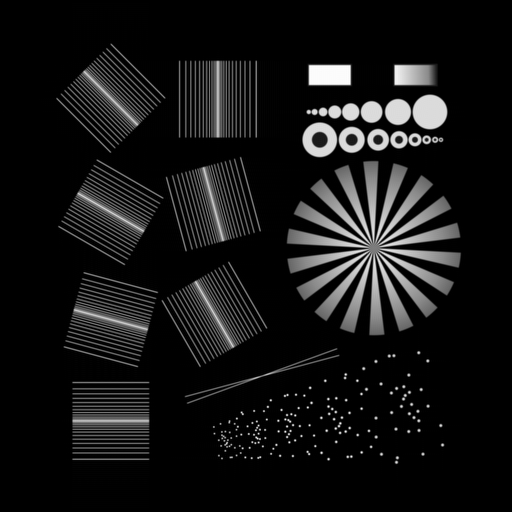

In [16]:
Gray.(img)

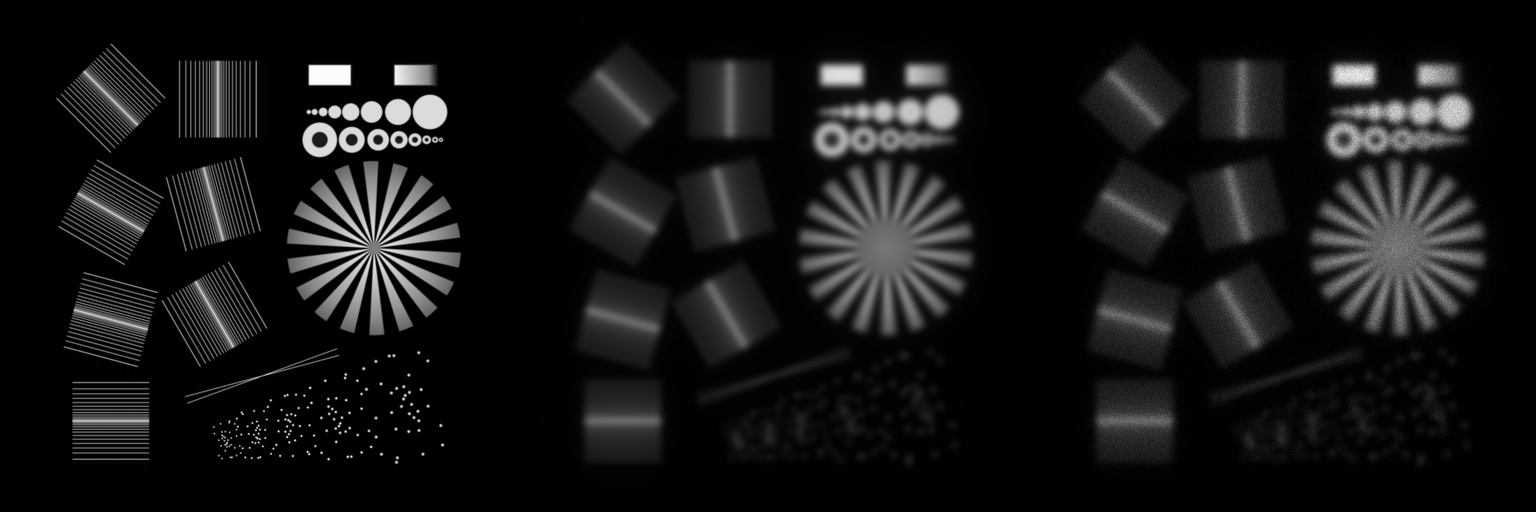

┌ Warning: Replacing module `ImageCore`
└ @ Base loading.jl:1036


In [3]:
# load test images
img = Float32.(testimage("resolution_test_512"))

psf = Float32.(generate_psf(size(img), 30))

# create a blurred, noisy version of that image
img_b = Float32.(conv(img, psf, [1, 2]))
img_n = poisson(img_b, 300);

h_view(img, img_b, img_n)

# Let's test Good's roughness

  1.260775 seconds (2.20 M allocations: 783.530 MiB, 2.81% gc time, 44.32% compilation time)
optim_res =  * Status: success

 * Candidate solution
    Final objective value:     6.076562e+02

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 1.16e-10 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.82e-11 ≰ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 1.75e-03 ≰ 1.0e-08

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    37
    f(x) calls:    89
    ∇f(x) calls:   38

  0.775730 seconds (2.19 M allocations: 391.074 MiB, 2.89% gc time, 69.82% compilation time)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     6.090802e+02

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 4.39e-02 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.07e-02

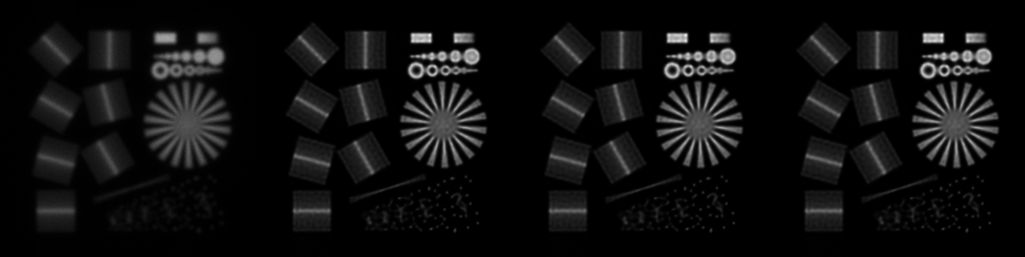

In [9]:
@time resGR100, optim_res = deconvolution(img_n, psf, regularizer=GR(), iterations=100)
@show optim_res

@time resGR15, optim_res = deconvolution(img_n, psf, regularizer=GR(), iterations=15)
@show optim_res

@time resGR15_2, optim_res = deconvolution(img_n, psf, λ=0.05, regularizer=GR(), iterations=15)
@show optim_res


h_view(img_n, resGR100, resGR15, resGR15_2)

# Let's test Total Variation

  1.607255 seconds (2.03 M allocations: 563.673 MiB, 8.44% gc time, 35.87% compilation time)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     2.142153e+03

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 9.50e-03 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.70e-03 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.23e+00 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.04e-03 ≰ 0.0e+00
    |g(x)|                 = 1.20e+00 ≰ 1.0e-08

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    50
    f(x) calls:    53
    ∇f(x) calls:   51

  0.756248 seconds (1.99 M allocations: 281.598 MiB, 2.90% gc time, 61.77% compilation time)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     2.381509e+03

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 5.29e-02 ≰ 0.0e+0

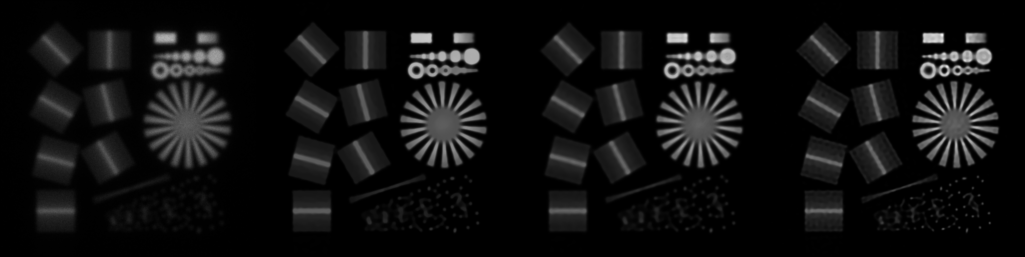

In [10]:
@time resTV50, optim_res = deconvolution(img_n, psf, regularizer=TV(), iterations=50)
@show optim_res
 
@time resTV15, optim_res = deconvolution(img_n, psf, regularizer=TV(), iterations=15)
@show optim_res
 
@time resTV15_2, optim_res = deconvolution(img_n, psf, λ=0.005, regularizer=TV(), iterations=15)
@show optim_res

h_view(img_n, resTV50, resTV15, resTV15_2)

# Let's test Tikhonov

  0.801661 seconds (2.02 M allocations: 330.837 MiB, 2.63% gc time, 64.85% compilation time)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     7.515793e+01

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 1.11e-01 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.67e-02 ≰ 0.0e+00
    |f(x) - f(x')|         = 7.34e+00 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 9.76e-02 ≰ 0.0e+00
    |g(x)|                 = 3.69e-01 ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    15
    f(x) calls:    18
    ∇f(x) calls:   16

  0.801650 seconds (1.88 M allocations: 324.573 MiB, 2.73% gc time, 62.54% compilation time)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     7.954003e+01

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 1.14e-01 ≰ 0.0e+0

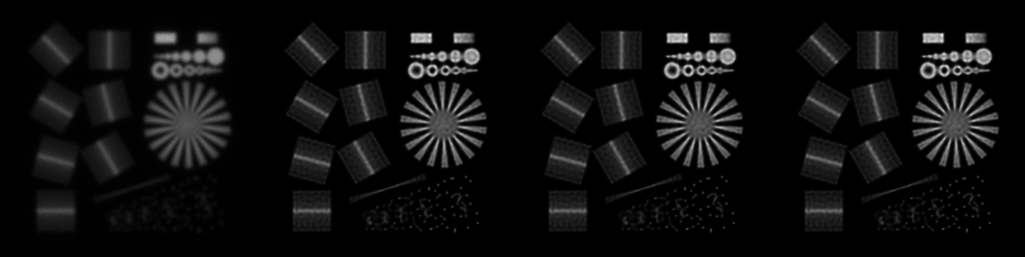

In [11]:
@time resTik1, optim_res = deconvolution(img_n, psf, λ=0.001, regularizer=Tikhonov(), iterations=15)
@show optim_res


@time resTik2, optim_res = deconvolution(img_n, psf, λ=0.0001, 
                    regularizer=Tikhonov(mode="spatial_grad_square"), iterations=15)
@show optim_res

@time resTik3, optim_res = deconvolution(img_n, psf, λ=0.0001, 
    regularizer=Tikhonov(mode="identity"), iterations=15)
@show optim_res

h_view(img_n, resTik1, resTik2, resTik3)

# Let's test without regularizer 

  0.637389 seconds (10.20 k allocations: 355.969 MiB, 1.17% gc time)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -3.476562e+00

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 1.18e-01 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.25e-02 ≰ 0.0e+00
    |f(x) - f(x')|         = 3.05e-01 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 8.76e-02 ≰ 0.0e+00
    |g(x)|                 = 4.32e-02 ≰ 1.0e-08

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    50
    f(x) calls:    53
    ∇f(x) calls:   51

  0.185840 seconds (3.38 k allocations: 145.318 MiB, 1.33% gc time)
optim_res =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     4.950000e+01

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 1.26e-01 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.97e-02 ≰ 0.0e+0

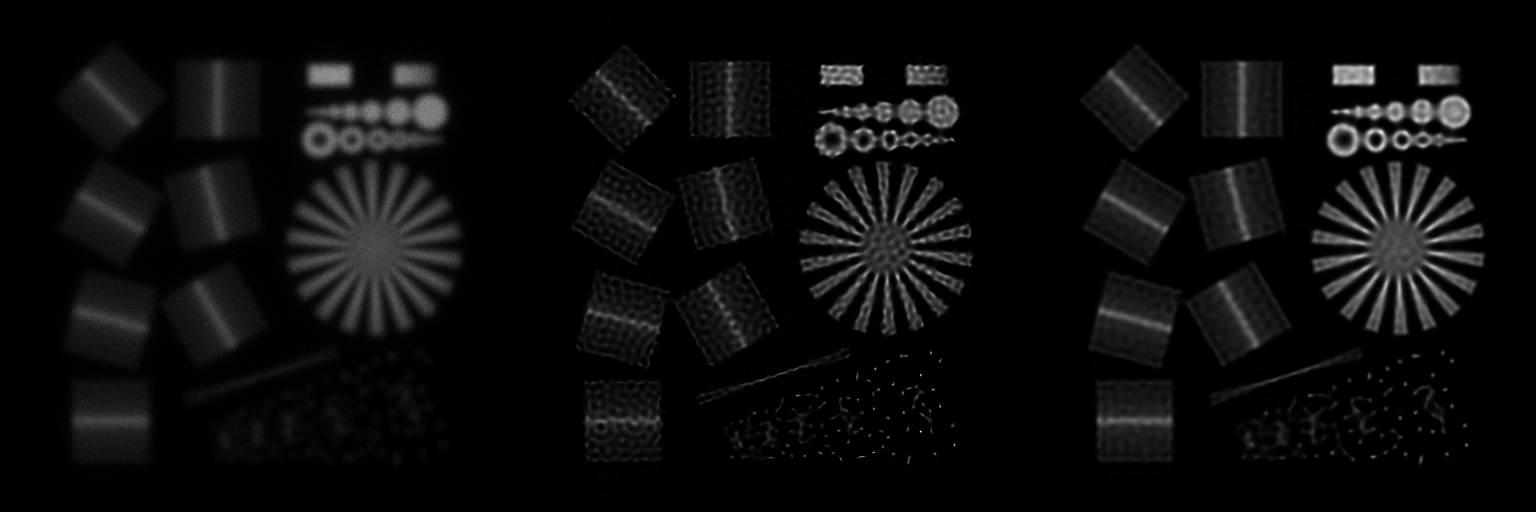

In [12]:
@time res100, optim_res = deconvolution(img_n, psf, regularizer=nothing, iterations=50)
@show optim_res

@time res15, optim_res = deconvolution(img_n, psf, regularizer=nothing, iterations=15)
@show optim_res

h_view(img_n, 0.7 .* res100, res15)

## Let's have a look at good results of some of the regularizers next to each other.

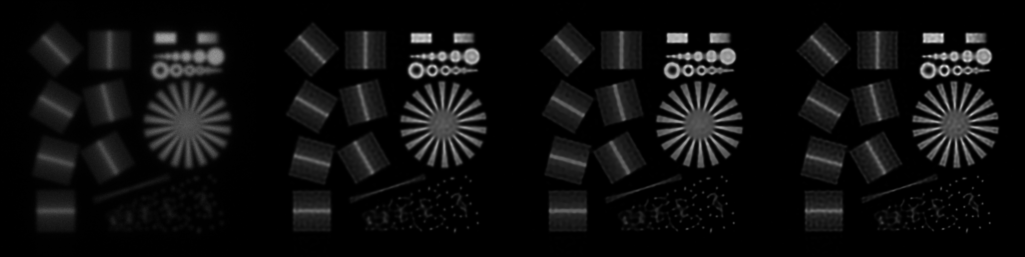

In [13]:
h_view(img_n, resGR15_2, resTV15_2, resTik3)